# i. Perkenalan

Nama : Abraham Rashid Haikal

Batch : HCK 18

Objective : Melakukan pengklasteran pada data nasabah bank dengan metode K-Means dan mendapatkan pemahaman segmen nasabah kartu kredit dari hasil klaster yang didapat dan memberikan strategi pemasaran produk yang sesuai untuk setiap segmen.

# ii. Query SQL

Data yang digunakan adalah data `credit-card-information` dari database hacktiv8 dengan ketentuan hanya mengambil data yang `CUST_ID`-nya bernilai genap. Data diambil dengan bantuan google colab dengan melakukan query berikut:

In [1]:
# Query yang digunakan untuk mengambil dataset
df = client.query('''

SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_018_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0

''').to_dataframe()

# iii. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

import pickle

# iv. Data Loading
Data di-load pada notebook dengan mengimport dataset yang sudah diquery dari google colab.

In [3]:
# Import csv ke dataframe
df = pd.read_csv('credit_info.csv')

In [4]:
df.head()

Unnamed: 0  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  \
0           0      788    16.581535              0.125      200.0   
1           1     1902   943.584041              0.875      103.0   
2           2     2322     1.979916              0.125       80.0   
3           3     3426   461.455720              1.000      585.0   
4           4     3976  1053.594730              1.000     1450.0   

   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0               0.0                   200.0           0.0   
1             103.0                     0.0           0.0   
2              80.0                     0.0           0.0   
3             585.0                     0.0           0.0   
4            1450.0                     0.0           0.0   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0                0.125                       0.000   
1                0.125                       0.125   
2                0.125                       0.125   
3                0.125                       0.125   
4                0.125                       0.125   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                             0.125                     0.0                 0   
1                             0.000                     0.0                 0   
2                             0.000                     0.0                 0   
3                             0.000                     0.0                 0   
4                             0.000                     0.0                 0   

   PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS  MINIMUM_PAYMENTS  \
0              2        1200.0    0.000000               NaN   
1              1        1000.0  215.325023        410.484825   
2              1        1500.0    0.000000               NaN   
3              1        1000.0  258.032630        151.696433   
4              1        1500.0  397.090516        227.143184   

   PRC_FULL_PAYMENT  TENURE  
0               0.0       8  
1               0.0       8  
2               0.0       8  
3               0.0       8  
4               0.0       8

In [5]:
df.tail()

Unnamed: 0  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  \
4470        4470     4630  1079.008102           1.000000       0.00   
4471        4471     8614   809.582978           0.909091       0.00   
4472        4472     4296  3386.490883           1.000000     560.98   
4473        4473     4476  4840.545574           1.000000    1595.93   
4474        4474     3564  1977.007090           1.000000    1032.04   

      ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
4470              0.00                    0.00   1259.571764   
4471              0.00                    0.00   3819.672466   
4472            427.22                  133.76   2008.153534   
4473           1595.93                    0.00   4359.325750   
4474            226.90                  805.14   4335.919227   

      PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
4470             0.000000                    0.000000   
4471             0.000000                    0.000000   
4472             1.000000                    0.727273   
4473             0.454545                    0.454545   
4474             0.909091                    0.090909   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
4470                          0.000000                0.545455   
4471                          0.000000                0.545455   
4472                          0.363636                0.545455   
4473                          0.000000                0.545455   
4474                          0.818182                0.545455   

      CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
4470                 9              0        1200.0  1379.635287   
4471                 7              0        4150.0  4372.148648   
4472                 9             20       10100.0  1039.000037   
4473                17             25        6000.0   905.844846   
4474                21             17        4000.0  3056.424974   

      MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4470        271.364415          0.090909      11  
4471        241.645387          0.090909      11  
4472        886.050237          0.000000      11  
4473       2376.919568          0.090909      11  
4474        910.707525          0.090909      11

# v. EDA

## Dimensi dan Tipe Data

In [6]:
print(df.shape)
print(df.info())

(4475, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        4475 non-null   int64  
 1   CUST_ID                           4475 non-null   int64  
 2   BALANCE                           4475 non-null   float64
 3   BALANCE_FREQUENCY                 4475 non-null   float64
 4   PURCHASES                         4475 non-null   float64
 5   ONEOFF_PURCHASES                  4475 non-null   float64
 6   INSTALLMENTS_PURCHASES            4475 non-null   float64
 7   CASH_ADVANCE                      4475 non-null   float64
 8   PURCHASES_FREQUENCY               4475 non-null   float64
 9   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 10  PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 11  CASH_ADVANCE_FREQUENCY            4475 non-null   float64


Data terdiri dari 19 kolom dan 4475 baris, dengan tipe data integer dan float.

## Missing Value

In [7]:
print(df.isnull().sum())

Unnamed: 0                            0
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


Terdapat 158 missing value pada kolom `MINIMUM_PAYMENTS`. Hal ini akan diselidiki lebih lanjut di Feature Engineering.

## Perbandingan Pembelian Cicilan dengan Pembelian Langsung

In [8]:
# Membuat dataframe baru untuk visualisasi
df_viz = df.copy()

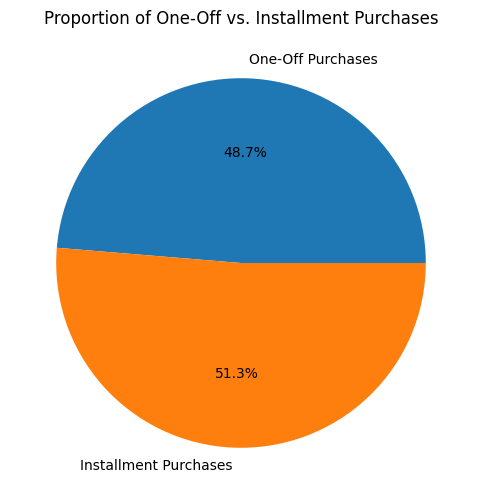

In [9]:
# Menghitung total pembelian dari pembelian langsung dan cicilan
df_viz['Total_Purchases'] = df_viz['ONEOFF_PURCHASES'] + df_viz['INSTALLMENTS_PURCHASES']

# Menghitung proporsi dari setiap jenis pembelian
df_viz['OneOff_Prop'] = df_viz['ONEOFF_PURCHASES'] / df_viz['Total_Purchases']
df_viz['Installment_Prop'] = df_viz['INSTALLMENTS_PURCHASES'] / df_viz['Total_Purchases']

# Membuat label untuk pie chart
pie_chart_slice_labels = ['One-Off Purchases', 'Installment Purchases']

# Menghitung nilai untuk pie chart
pie_chart_slice_values = df_viz['OneOff_Prop'].sum(), df_viz['Installment_Prop'].sum()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title('Proportion of One-Off vs. Installment Purchases')
plt.show()

Berdasarkan analisis, nasabah cenderung sedikit lebih banyak melakukan pembelian dengan cicilan daripada pembelian langsung dimana persentase pembelian dengan cicilan adalah 51.3% dan persentase pembelian langsung adalah 48.7%

## Perbandingan Frekuensi Jenis Transaksi Nasabah

In [10]:
# Menghitung rata-rata untuk pembelian langsung, cicilan, dan paylater
langsung_avg = df.ONEOFF_PURCHASES_FREQUENCY.mean()
cicil_avg = df.PURCHASES_INSTALLMENTS_FREQUENCY.mean()
later_avg = df.CASH_ADVANCE_FREQUENCY.mean()

print(f'Rata-rata frekuensi pembelian langsung: {langsung_avg:.2f}')
print(f'Rata-rata frekuensi pembelian cicilan: {cicil_avg:.2f}')
print(f'Rata-rata frekuensi pembelian paylater: {later_avg:.2f}')

Rata-rata frekuensi pembelian langsung: 0.20
Rata-rata frekuensi pembelian cicilan: 0.36
Rata-rata frekuensi pembelian paylater: 0.13


Berdasarkan perhitungan rata-rata frekuensi pembelian, nasabah cenderung lebih sering melakukan pembelian dengan cicilan daripada jenis pembayaran lainnya.

# vi. Feature Engineering

## Kardinalitas

In [11]:
# Membuat fungsi cek kardinalitas
def cardinality_func(df):

    # Mengatur agar jumlah kolom yang ditampilkan tidak dibatasi
    pd.set_option('display.max_colwidth', None)

    # Mengatur agar jumlah baris yang ditampilkan tidak dibatasi
    pd.set_option('display.max_rows', None)

    # Membuat wadah untuk menyimpan nilai kolom, jumlah nilai unik, dan daftar nilai kolom tersebut
    columns =[]
    nuniques =[]
    uniques = []

    # Membuat looping untuk setiap kolom pada string_columns
    for column in df.columns:
        columns.append(column) # Menambah nama kolom ke wadah
        nuniques.append(df[column].nunique()) # Menambah jumlah nilai unik ke wadah
        uniques.append(df[column].unique()) # Menambah daftar nilai unik ke wadah

    # Membuat dataframe dari wadah yang sudah diisi oleh loop
    card_df = pd.DataFrame()
    card_df['Nama Kolom']=columns
    card_df['Kardinalitas']=nuniques
    card_df['Nilai Unik']=uniques
    
    return card_df

In [12]:
cardinality_func(df)

Nama Kolom  Kardinalitas  \
0                         Unnamed: 0          4475   
1                            CUST_ID          4475   
2                            BALANCE          4439   
3                  BALANCE_FREQUENCY            42   
4                          PURCHASES          3218   
5                   ONEOFF_PURCHASES          2073   
6             INSTALLMENTS_PURCHASES          2357   
7                       CASH_ADVANCE          2155   
8                PURCHASES_FREQUENCY            47   
9         ONEOFF_PURCHASES_FREQUENCY            44   
10  PURCHASES_INSTALLMENTS_FREQUENCY            47   
11            CASH_ADVANCE_FREQUENCY            46   
12                  CASH_ADVANCE_TRX            55   
13                     PURCHASES_TRX           147   
14                      CREDIT_LIMIT           153   
15                          PAYMENTS          4350   
16                  MINIMUM_PAYMENTS          4317   
17                  PRC_FULL_PAYMENT            47   
18                            TENURE             7   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Nilai Unik  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Berdasarkan pengecekan kardinalitas, kolom `Unnamed: 0` yang merupakan kolom index dari query sebelumnya dan kolom `CUST_ID` memiliki nilai unik untuk setiap baris pada dataframe sehingga harus di hapus. Selain itu, kolom `TENURE` yang merupakan lama kepemilikan kartu nasabah memiliki kardinalitas yang rendah sehingga terindikasi sebagai kolom kategorikal dan maka dari itu akan di hapus dari dataframe.

In [13]:
# Menghapus kolom yang tidak relevan
df = df.drop(['Unnamed: 0', 'CUST_ID', 'TENURE'], axis=1)

## Missing Value Analysis

In [14]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
dtype: int64

Terdapat 158 missing value pada kolom `MINIMUM_PAYMENTS`. Selanjutnya dilakukan filtering untuk menyelidiki lebih lanjut.

In [15]:
# Filtering baris dengan price yang missing value
missing_df = df.loc[df['MINIMUM_PAYMENTS'].isnull() == True]

lalu dilakukan pengecekan kardinalitas pada `missing_df` untuk mencari kesamaan pada semua baris yang kolom `MINIMUM_PAYMENTS`-nya berupa missing value

In [16]:
cardinality_func(missing_df)

Nama Kolom  Kardinalitas  \
0                            BALANCE           126   
1                  BALANCE_FREQUENCY            23   
2                          PURCHASES           118   
3                   ONEOFF_PURCHASES            63   
4             INSTALLMENTS_PURCHASES            75   
5                       CASH_ADVANCE            64   
6                PURCHASES_FREQUENCY            24   
7         ONEOFF_PURCHASES_FREQUENCY            15   
8   PURCHASES_INSTALLMENTS_FREQUENCY            23   
9             CASH_ADVANCE_FREQUENCY            15   
10                  CASH_ADVANCE_TRX            15   
11                     PURCHASES_TRX            27   
12                      CREDIT_LIMIT            37   
13                          PAYMENTS            33   
14                  MINIMUM_PAYMENTS             0   
15                  PRC_FULL_PAYMENT             1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Nilai Unik  
0   [16.581535, 1.979916, 2730.843802, 18.885677, 0.0, 0.401279, 18.906225, 2329.485768, 1311.995984, 0.01968, 3215.903805, 4014.388265, 515.904786, 0.62424, 674.817091, 1.600479, 4007.029155, 337.629461, 7.314379, 28.329892, 3946.421177, 79.625341, 3.574463, 230.359954, 1548.76729, 3.956222, 0.391963, 32.124999, 0.407093, 0.147275, 2.11508, 1.025109, 11.890862, 3.248979, 845.815387, 5.465999, 451.076499, 207.632783, 189.687964, 3.744789, 1.151323, 7.331662, 0.734665, 150.351606, 39.798993, 14.524779, 150.699542, 161.926545, 6.660517, 3.229304, 2557.241228, 176.721561, 26.982025, 1307.717841, 9.444869, 9.522029, 2.322666, 10.65253, 10.805893, 5.120644, 11.918653, 2.571837, 1651.127455, 1252.58309, 19.354559, 23.407282, 39.930624, 37.123618, 10.954457, 198.951791, 123.822604, 68.10541, 5523.999416, 1872.926275, 3505.671311, 5347.814547, 4184.915498, 2302.479845, 5837.105453, 1133.090254, 2856.473263, 1367.703777, 312.197634, 2.307336, 0.006651, 44.525353, 41.762859, 10.703306, 2.777589, 253.08362, 6.824905, 10.248544, 1.864427, 675.117139, 282.934373, 1.420316, 23.150437, 286.686616, 1138.314061, 2797.233197, ...]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Berdasarkan hasil pengecekan kardinalitas, ditemukan bahwa kolom `PRC_FULL_PAYMENT` yang merupakan persentase pembayaran penuh yang dilakukan nasabah, semua bernilai 0, artinya missing value pada dataframe berhubungan dengan orang yang tidak membayar tagihan kreditnya. Berdasarkan penemuan ini, saya memilih untuk tidak melakukan imputasi karena minimum payment nasabah ini tidak bernilai 0 terbukti pada kolom `INSTALLMENT_PURCHASE` yang menunjukkan jumlah pembelian dengan cicilan yang tidak bernilai. Oleh karena itu Saya memilih untuk melakukan penghapusan pada missing value di dataframe.

In [17]:
# Menghapus missing value pada dataframe.
df = df.dropna()

## Outlier Analysis

Outlier Analysis dilakukan dengan local outlier factor dimana setiap matriks dibandingkan dengan matriks lainnya untuk mengetahui apakah matriks tersebut merupakan outlier atau bukan.

In [18]:
# Melakukan scaling sebelum LOF
scaler=RobustScaler()

# Menyimpan dataframe yang sudah di-scale ke dataframe baru
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [19]:
# Mendefinisikan localo outlier factor
lof = LocalOutlierFactor(n_neighbors = 20,contamination=0.05)

# Membuat label indikator outlier pada dataframe berdasarkan fit_predict lof pada dataframe yang sudah di-scale
df['lof_label'] = lof.fit_predict(df_scaled)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1   943.584041              0.875      103.0             103.0   
3   461.455720              1.000      585.0             585.0   
4  1053.594730              1.000     1450.0            1450.0   
5  2237.238086              1.000      120.0             120.0   
7   424.994385              0.375     1200.0            1200.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   
5                       0.125                               0.0   
7                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                     0.0                 0              1        1000.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
7                     0.0                 0              1        1200.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  lof_label  
1  215.325023        410.484825               0.0          1  
3  258.032630        151.696433               0.0          1  
4  397.090516        227.143184               0.0          1  
5  343.102984        712.986387               0.0          1  
7   57.266292         56.720210               0.0          1

Metode LOF membuat indikator data outlier pada kolom `lof_label` dimana nilai -1 artinya data tersebut merupakan outlier dan nilai 1 artinya bukan outlier.

In [20]:
df.lof_label.value_counts()

lof_label
 1    4100
-1     216
Name: count, dtype: int64

Jumlah outlier pada dataframe adalah sebanyak 216. Outlier ini selanjutnya akan dihapus dari dataframe.

In [22]:
# Memfilter dataframe untuk mengambil data yang bukan outlier
df_clean = df[(df['lof_label']!= -1)]

In [54]:
# Menghapus kolom indikator outlier pada dataframe
df_clean.drop('lof_label',axis=1,inplace=True)

## Dimensionality Reduction

Dataframe yang sudah bersih kemudian dilakukan dimensionality reduction agar data lebih mudah diolah oleh model yang akan digunakan.

In [55]:
# melakukan scaling pada dataframe
scaler = MinMaxScaler()
clean_scaled = scaler.fit_transform(df_clean)

# Melakukan dimensionality reduction dengan PCA
pca = PCA(random_state= 5697)
pca.fit(clean_scaled)

PCA(random_state=5697)

Text(0, 0.5, 'Eigenvalues')

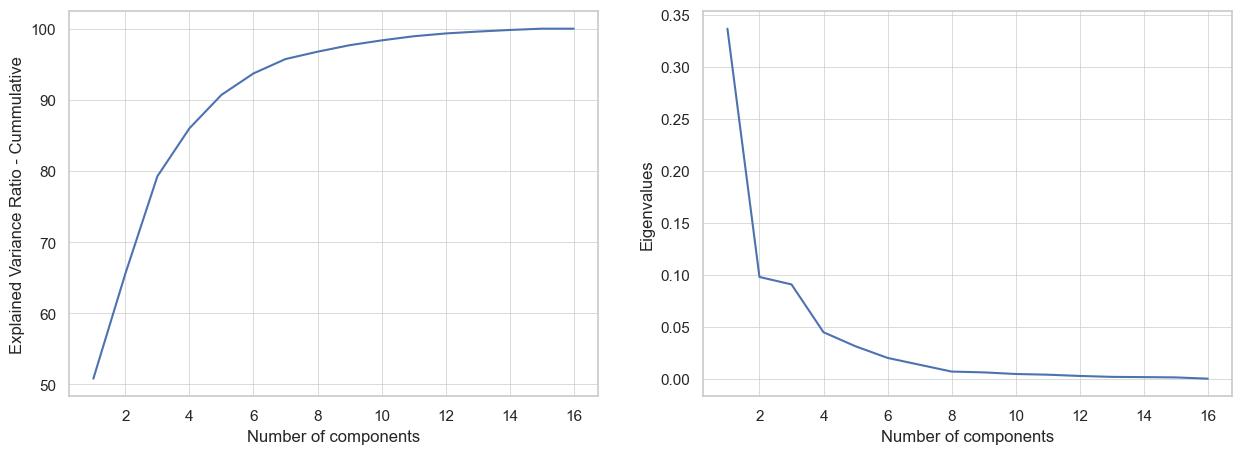

In [56]:
# Plot Rasio Cummulative of Explained Variance
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid(True, linestyle='-', linewidth=0.5)
plt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot Eigenvalues
plt.subplot(1, 2, 2)
plt.grid(True, linestyle='-', linewidth=0.5)
plt.plot(range(1, 17), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Berdasarkan plot explained variance ratio, 6-8 fitur sudah cukup untuk menangkap 95% informasi dari data. 

Berdasarkan plot eigenvalue, garis mulai berubah menjadi rata secara signifikan di 8 komponen.

In [57]:
# Cek jumlah fitur yang dijaga untuk mempertahankan 95% informasi data
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(7)

Jumlah fitur yang digunakan jika ingin mempertahankan 95% informasi dari data adalah 7.

In [58]:
# Melakukan PCA dengan n_component sebesar 0.95
pca = PCA(n_components=0.95)
pca.fit(clean_scaled)
clean_pca = pca.transform(clean_scaled)

# vii. Model Definition

Model yang digunakan adalah K-Means. Untuk menemukan jumlah kluster yang pas, dilakukan penyelidikan terlebih dahulu dengan elbow method dan visualisasi

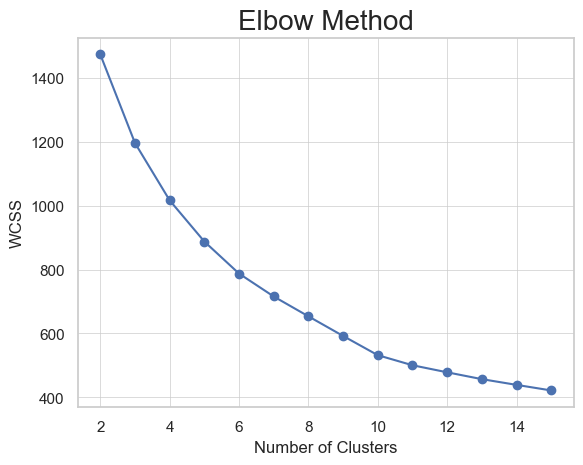

In [59]:
# Menentukan nilai K dengan Elbow Method
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(clean_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid(True, linestyle='-', linewidth=0.5)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Berdasarkan plot WCSS, jumlah kluster yang digunakan berada diantara 4-7. Jumlah kluster yang digunakan dapat diselidiki lebih lanjut dengan melakukan visualisasi menggunakan Silhouette plot

In [60]:
# Function to create Silhouette Plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.4036442615458322
For n_clusters = 3 The average silhouette_score is : 0.3915260449231205
For n_clusters = 4 The average silhouette_score is : 0.3552581487145556
For n_clusters = 5 The average silhouette_score is : 0.3443153146562821
For n_clusters = 6 The average silhouette_score is : 0.3526218057640745
For n_clusters = 7 The average silhouette_score is : 0.33616361328640676
For n_clusters = 8 The average silhouette_score is : 0.34813633385936243
For n_clusters = 9 The average silhouette_score is : 0.350478733758568
For n_clusters = 10 The average silhouette_score is : 0.32408065144472603
For n_clusters = 11 The average silhouette_score is : 0.3224515982429046
For n_clusters = 12 The average silhouette_score is : 0.32203057100060273
For n_clusters = 13 The average silhouette_score is : 0.32700987735027015
For n_clusters = 14 The average silhouette_score is : 0.3167165134646132


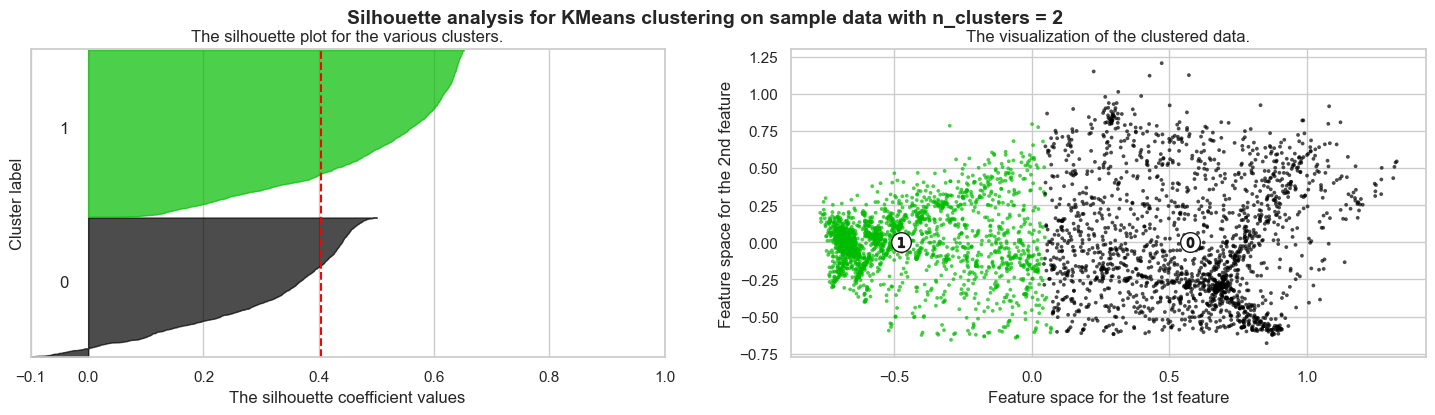

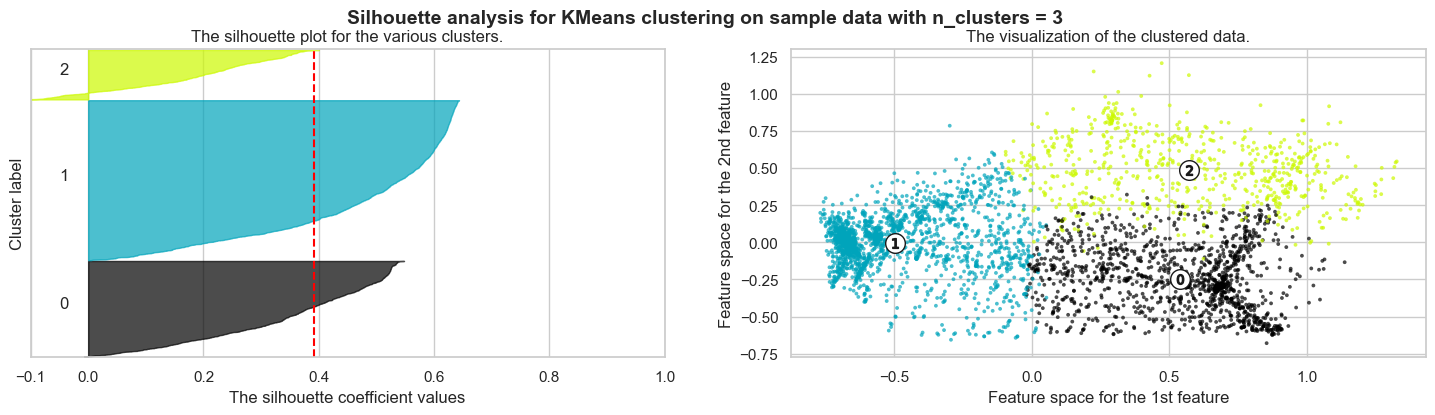

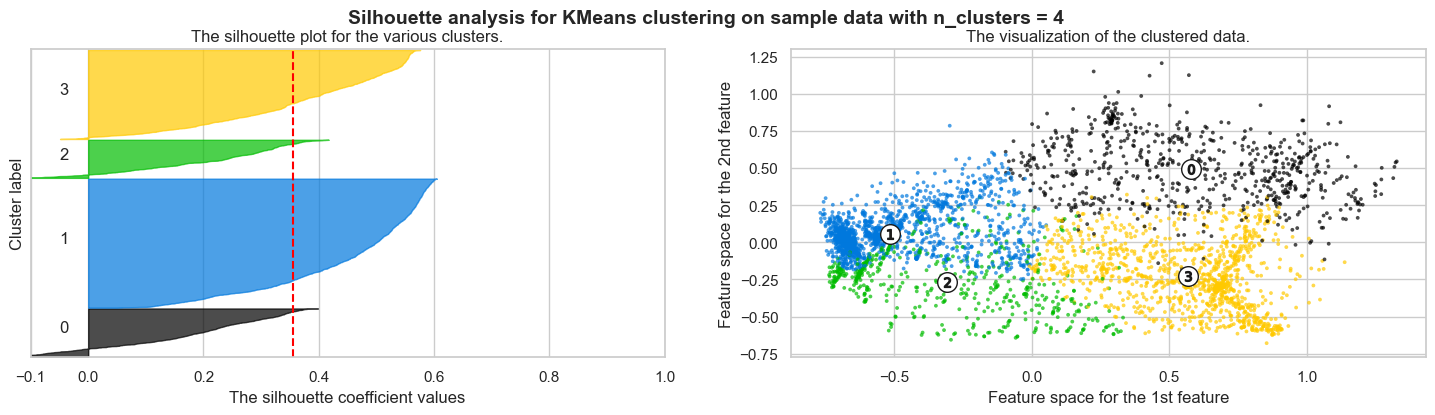

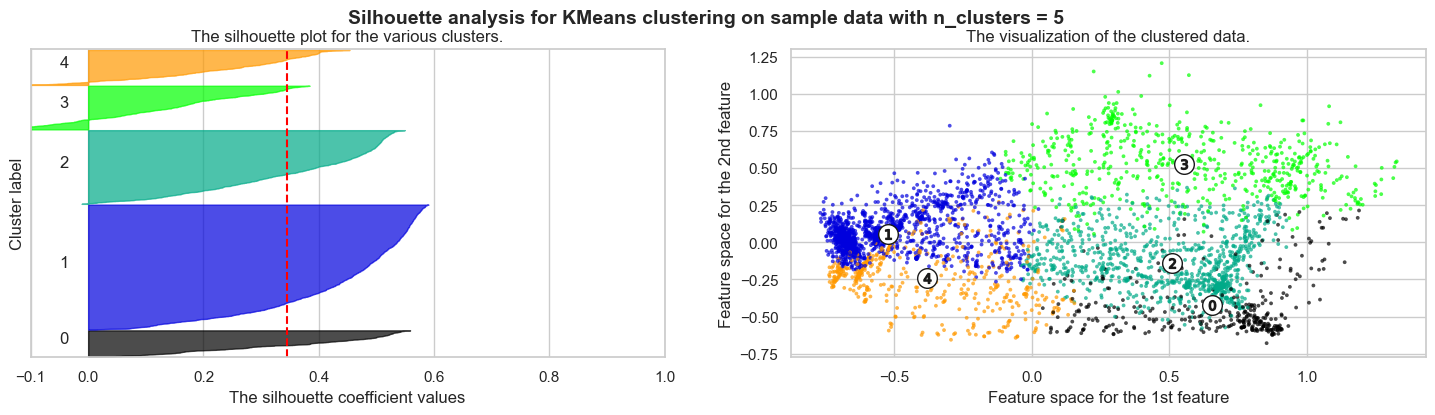

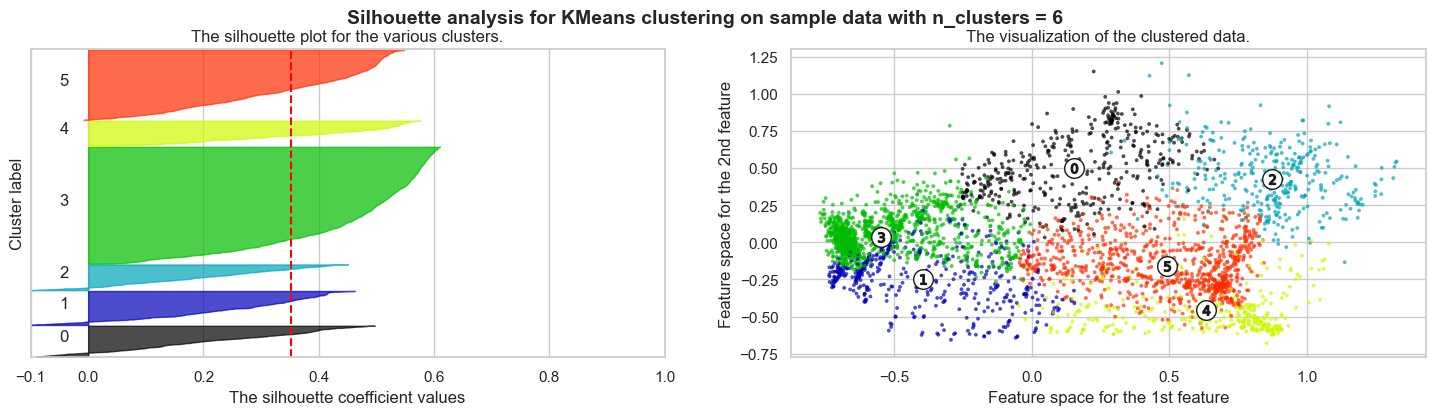

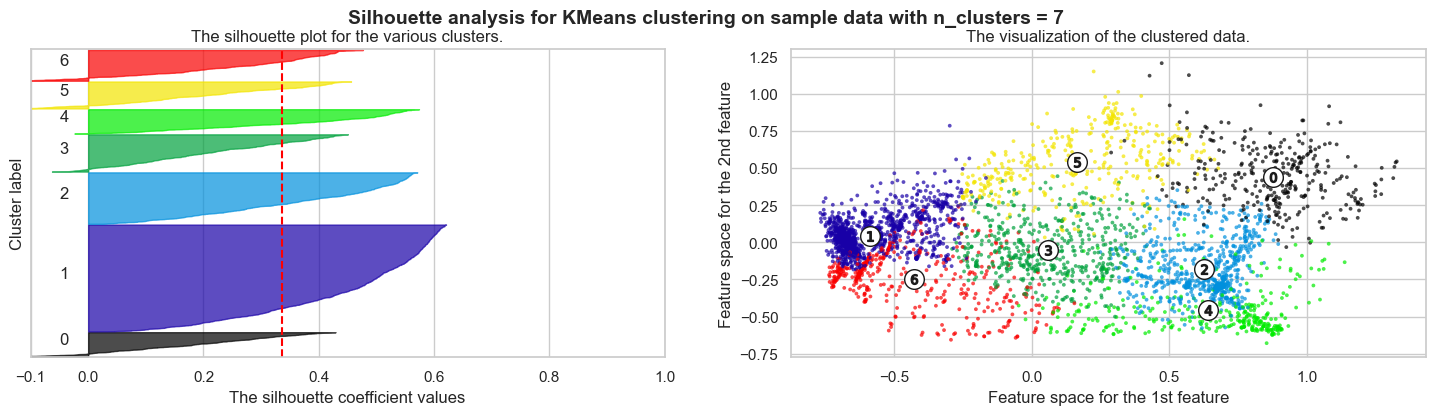

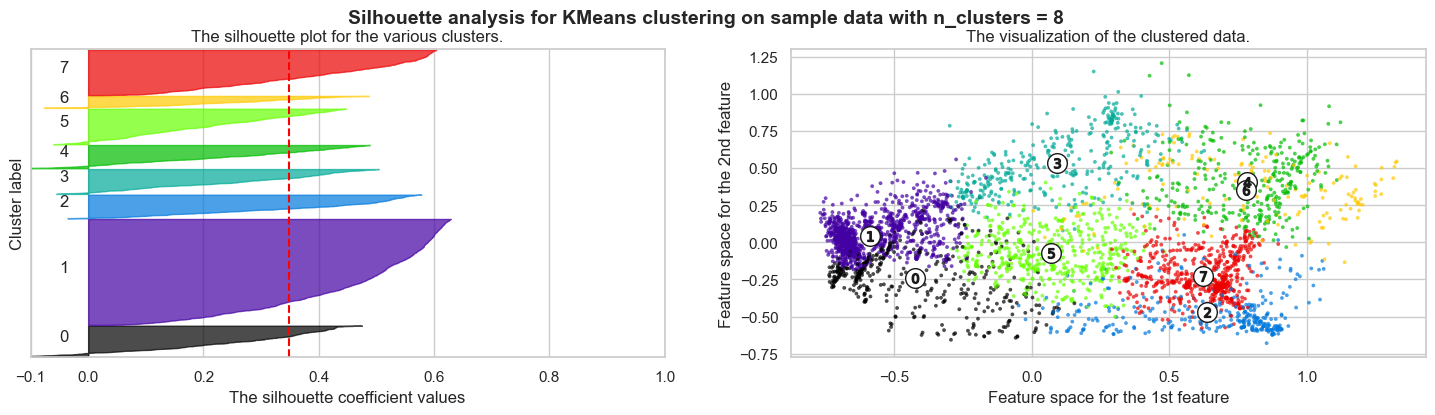

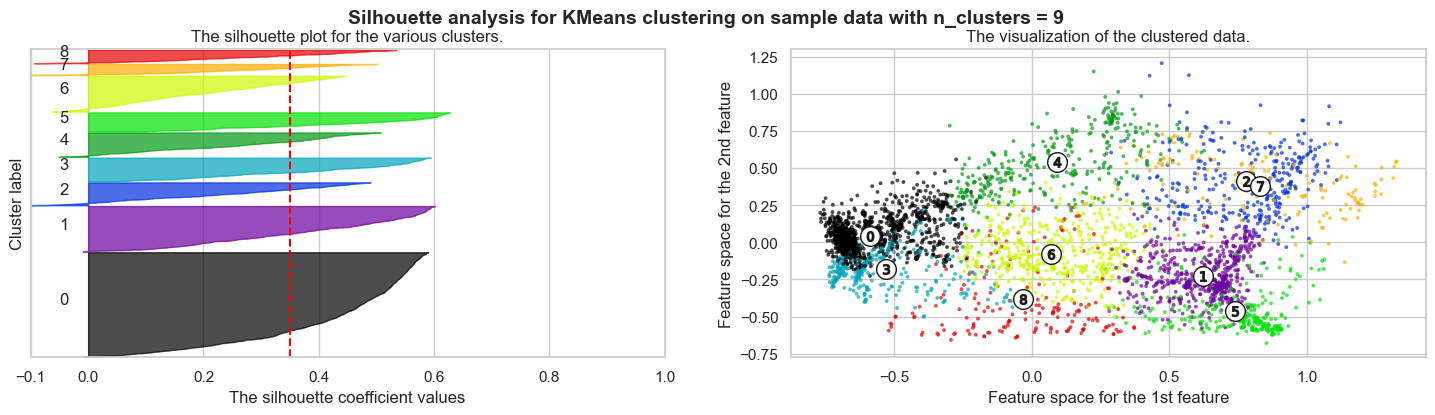

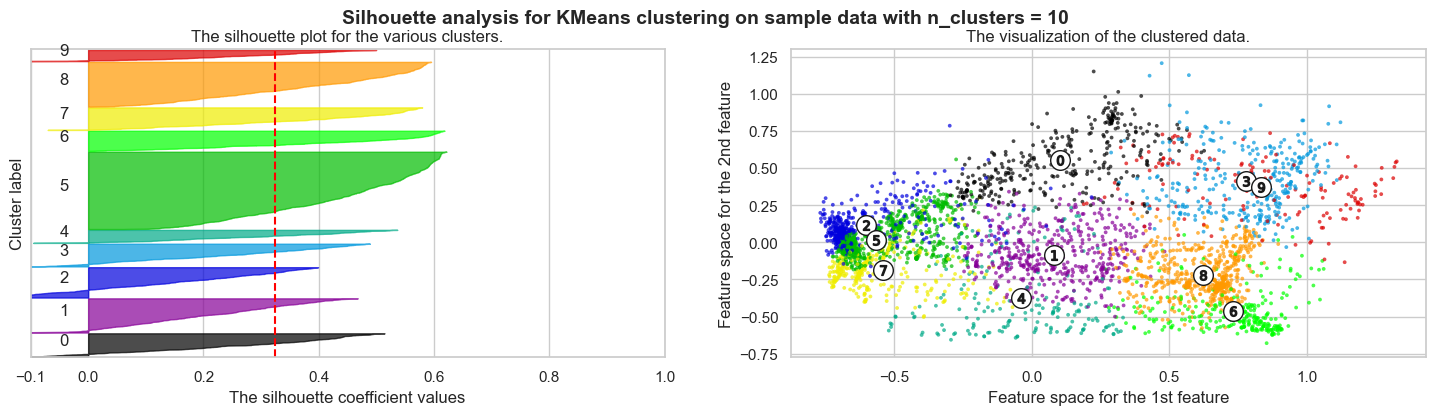

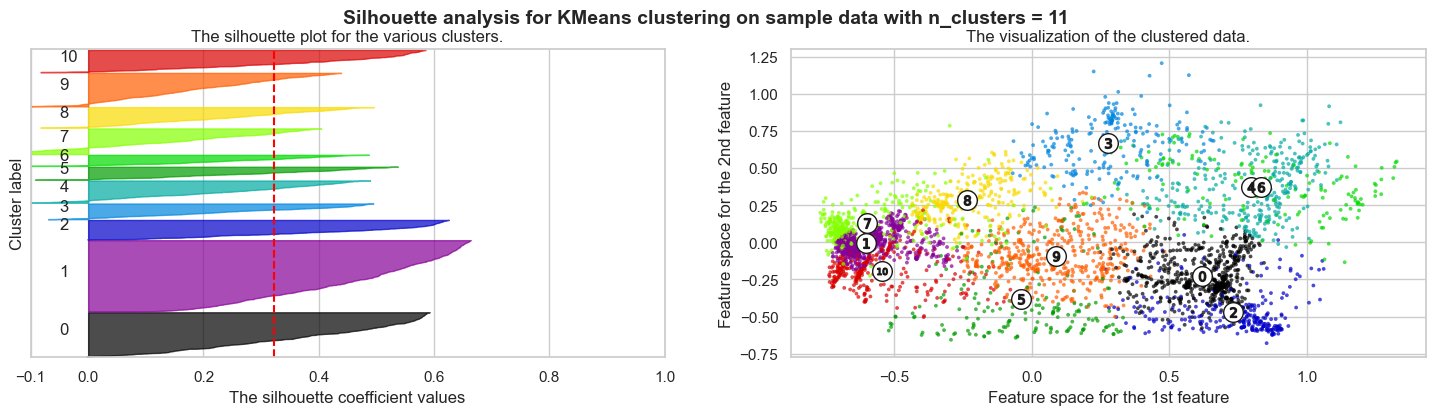

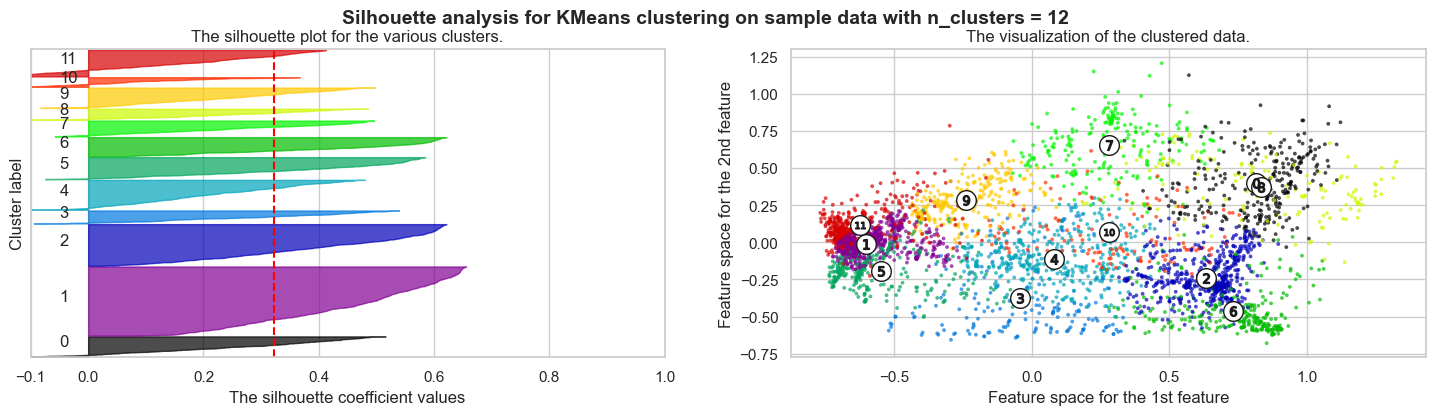

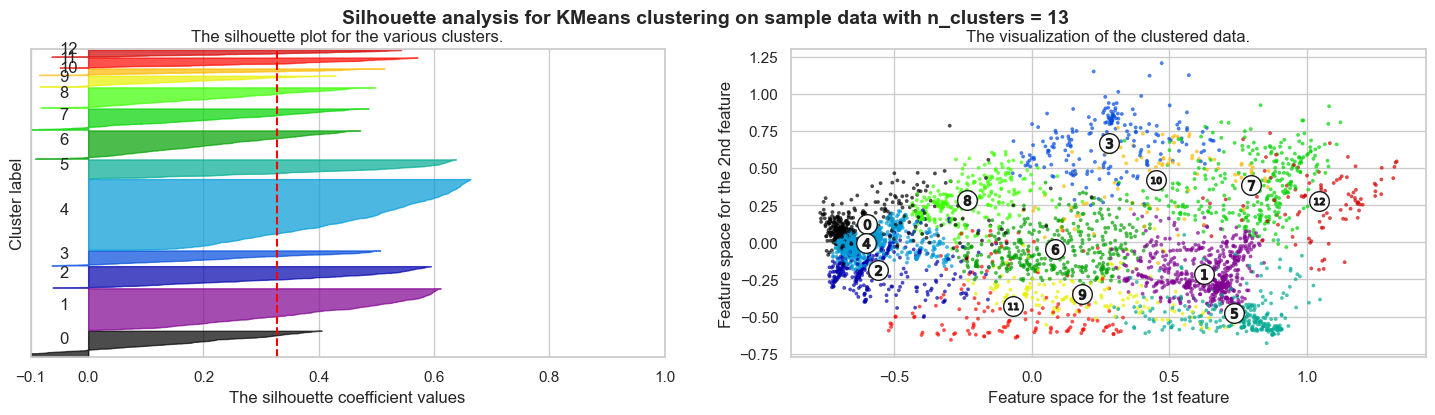

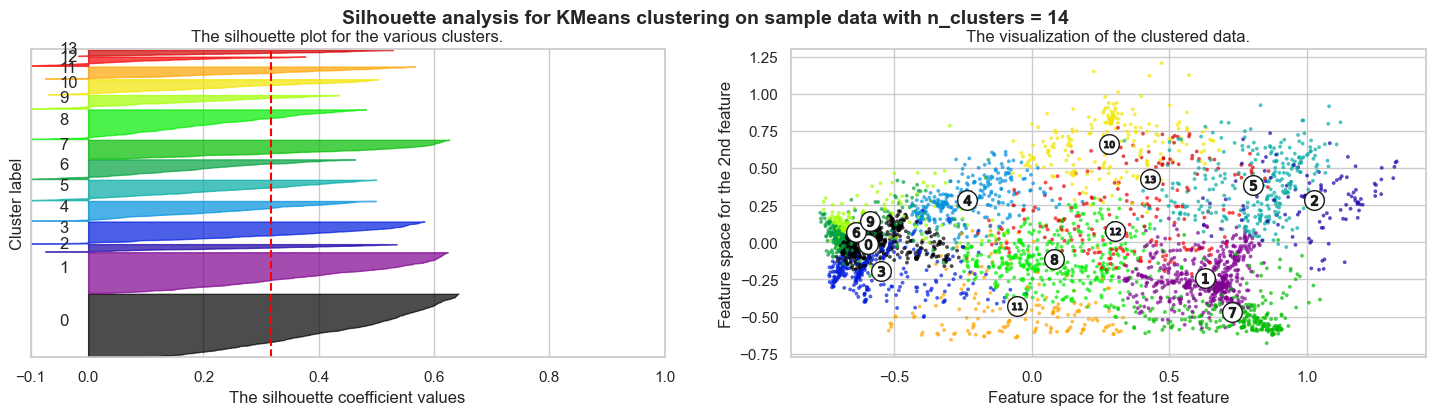

In [61]:
# Menampilkan koefisien dan visualisasi silhouette

plot_silhouette(range(2, max_cluster), clean_pca, random_state=5697)

Berdasarkan hasil visualisasi silhouette plot, secara visual pemisahan dengan 3 kluster menunjukkan pengelompokkan data yang baik dan nilai koefisien silhouettenya juga terbilang lebih baik dari kluster lainnya, sehingga dipilih jumlah kluster sebanyak 3.

# viii. Model Training

Model dilatih menggunakan parameter yang sudah ditemukan dari proses sebelumnya yaitu `n_cluster = 3`

In [62]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 5697)
km

KMeans(n_clusters=3, n_init=10, random_state=5697)

# ix. Model Evaluation

Hasil prediksi model dievaluasi dengan EDA lanjutan

In [63]:
# Prediksi dataset
pred = km.fit_predict(clean_pca)
pred

array([1, 1, 1, ..., 2, 1, 0], dtype=int32)

In [64]:
# Membuat dataframe baru untuk EDA lanjutan
df_eda = df_clean.copy()

In [65]:
# Menambah kolom cluster pada dataframe berdasarkan hasil prediksi
df_eda['cluster'] = pred
df_eda.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1   943.584041              0.875      103.0             103.0   
3   461.455720              1.000      585.0             585.0   
4  1053.594730              1.000     1450.0            1450.0   
5  2237.238086              1.000      120.0             120.0   
7   424.994385              0.375     1200.0            1200.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   
5                       0.125                               0.0   
7                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                     0.0                 0              1        1000.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
7                     0.0                 0              1        1200.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  cluster  
1  215.325023        410.484825               0.0        1  
3  258.032630        151.696433               0.0        1  
4  397.090516        227.143184               0.0        1  
5  343.102984        712.986387               0.0        1  
7   57.266292         56.720210               0.0        1

## EDA 2

<Axes: >

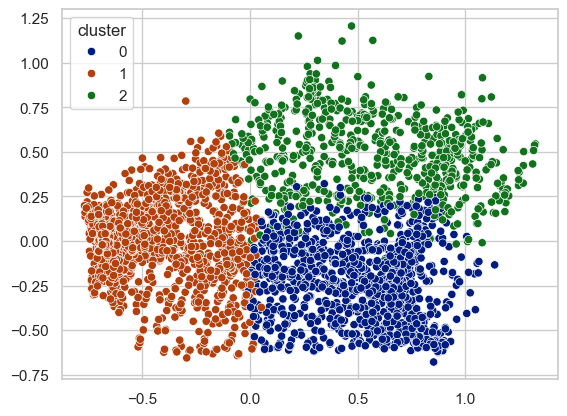

In [66]:
# Visualisasi klaster 2D

pca_2d = PCA(n_components=0.95)
pca_2d.fit(clean_scaled)

df_eda_pca_2d = pca_2d.fit_transform(clean_scaled)

sns.scatterplot(x=df_eda_pca_2d[:,0], y=df_eda_pca_2d[:,1], hue=df_eda['cluster'], palette='dark')

Berdasarkan visualisasi, terlihat bahwa kluster 0 dan 1 memiliki pusat yang cukup padat dengan separasi yang jelas dengan kluster lainnya, namun kluster 2 memiliki kepadatan pusat yang lebih rendah dibanding kluster lainnya. Selain itu beberapa titik data milik kluster 2 masih bertindihan dengan kluster 0 sehingga ada kemungkinan miss-clustering pada kluster 2.

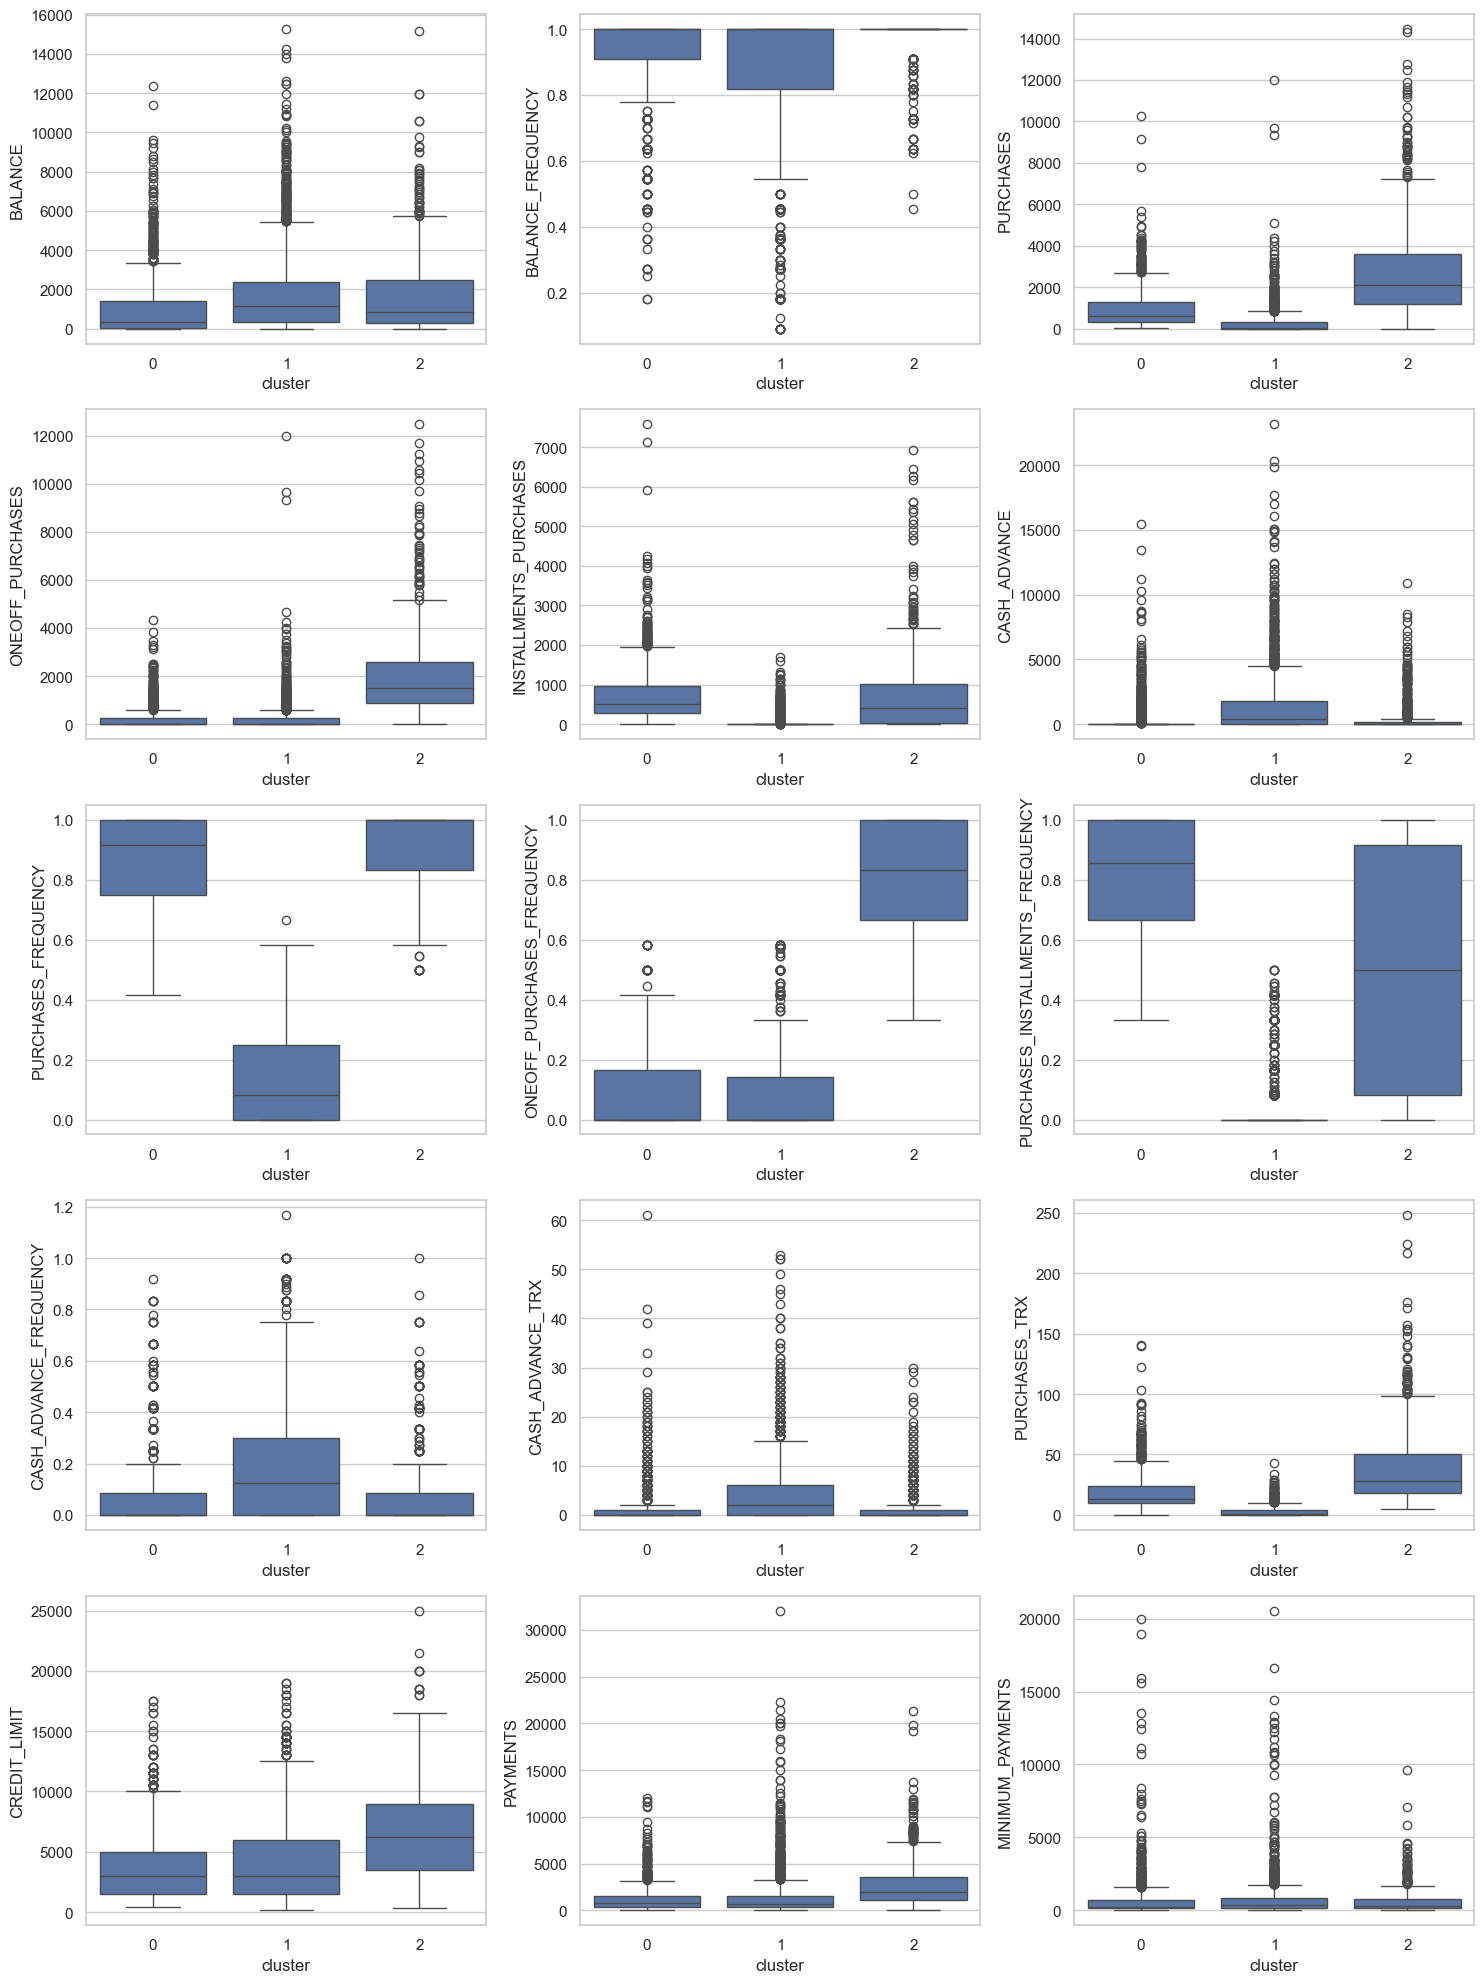

In [74]:
# Menampilkan boxplot untuk melihat pengelompokkan yang dihasilkan secara visual
df_col = df.columns.tolist()

fig, axes = plt.subplots(5, 3, figsize=(15,20))

axes = axes.flatten()

for ax, col in zip(axes, df_col[:15]):
    _ = sns.boxplot(x=df_eda["cluster"], y=df_eda[col], ax=ax)
    plt.tight_layout()

Berdasarkan visualisasi boxplot, kluster yang dibuat dapat menunjukkan perbedaan antar kluster pada segi `PURCHASES`, `PURCHASES_INSTALLEMENT_FREQUENCY`, `PURHCASES_TRX`, dan `CREDIT_LIMI`

In [67]:
# Membuat fungsi untuk melihat nilai rata-rata setiap kluster
def clusterStats(clusterNumber):
    cluster = df_eda[df_eda['cluster'] == clusterNumber]
    numRows = cluster.shape[0]
    totalRows = df_eda.shape[0]
    percentage = (numRows / totalRows) * 100
    
    stats = {
        'Cluster': clusterNumber,
        'Jumlah Customer': numRows,
        'Percentage Customer': f'{percentage:.2f}%'
    }
    
    mean_values = cluster.mean().to_dict()
    stats.update(mean_values)
    
    return stats

# Membuat wadah untuk nilai rata-rata
clusterStatistic = []
for i in range(3):  # membuat kondisi looping sesuai jumlah kluster (3)
    clusterStatistic.append(clusterStats(i))

# Mengubah ke dataframe
clusterStats = pd.DataFrame(clusterStatistic)

# menghapus kolom 'cluster' yang sebelumnya
clusterStats = clusterStats.drop(columns=['cluster'])

clusterStats

Cluster  Jumlah Customer Percentage Customer      BALANCE  \
0        0             1284              31.32%  1051.595619   
1        1             2151              52.46%  1776.853748   
2        2              665              16.22%  1718.648212   

   BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.930430   961.473146        233.639299              728.706573   
1           0.858847   284.622808        234.625955               50.248982   
2           0.973621  2801.180752       2058.815278              742.365474   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    427.895656             0.864583                    0.096430   
1   1373.887716             0.148063                    0.086916   
2    504.199566             0.896126                    0.793307   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.811378                0.063811          1.554517   
1                          0.059872                0.190540          4.365876   
2                          0.499528                0.080796          1.706767   

   PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0      18.989097   3726.980475  1200.422373        704.820219   
1       2.712227   4035.696575  1439.633426        752.961812   
2      39.464662   6698.751880  2715.969111        634.522735   

   PRC_FULL_PAYMENT  
0          0.249334  
1          0.070282  
2          0.267688

Berdasarkan jumlah, kluster 0, 1 dan 2 merepresentasikan sebesar 31.32%, 52.46% dan 16.22% dari total nasabah. 

Berdasarkan rata-rata `PURCHASE`-nya, kluster 1 mewakili nasabah dengan pengeluaran paling rendah dan kluster 2 mewakili nasabah dengan pengeluaran terbesar.

Berdasarkan rata-rata `PURCHASES_INSTALLMENT_FREQUENCY`, kluster 1 mewakili nasabah dengan frekuensi peminjaman cicilan paling rendah dan kluster 0 dengan frekuensi tertinggi.

Berdasarkan rata-rata `PURCHASE_TRX`-nya, kluster 1 mewakili nasabah jumlah transaksi paling rendah dan kluster 2 mewakili nasabah dengan jumlah transaksi terbesar.

Berdasarkan rata-rata `CREDIT_LIMIT`, kluster 0 mewakili nasabah dengan limit terendah dan kluster 2 dengan limit tertinggi.

selain fitur diatas, tidak terlihat adanya pemisahan yang signifikan pada semua kluster.

# x. Model Saving

Menyimpan scaler, pca, dan model yang digunakan untuk data inference.

In [ ]:
with open('model.pkl', 'wb') as file1:
    pickle.dump(km, file1)

with open('scaler.pkl', 'wb') as file2:
    pickle.dump(scaler, file2)

with open('pca.pkl', 'wb') as file3:
    pickle.dump(pca, file3)

# xi. Model Inference

Membuat data inference dengan mengambil 5 sampel dari dataframe dan mengubah nilai di dalamnya secara manual lalu mengeksport data inference ke csv untuk dikerjakan di notebook yang baru.

In [75]:
# Mengambil sampel dari dataframe sebelumnya
data_inference = df_clean.sample(5, random_state=5697)

In [76]:
# Mengubah sampel ke dictionary
data_inference.to_dict()

{'BALANCE': {508: 1055.833418,
  774: 2362.643772,
  1848: 1132.615315,
  3150: 531.075085,
  3266: 167.044456},
 'BALANCE_FREQUENCY': {508: 1.0,
  774: 1.0,
  1848: 1.0,
  3150: 0.818182,
  3266: 1.0},
 'PURCHASES': {508: 351.54,
  774: 2826.99,
  1848: 136.19,
  3150: 485.73,
  3266: 1477.42},
 'ONEOFF_PURCHASES': {508: 61.54,
  774: 1496.59,
  1848: 136.19,
  3150: 152.4,
  3266: 0.0},
 'INSTALLMENTS_PURCHASES': {508: 290.0,
  774: 1330.4,
  1848: 0.0,
  3150: 333.33,
  3266: 1477.42},
 'CASH_ADVANCE': {508: 0.0,
  774: 0.0,
  1848: 0.0,
  3150: 474.10077,
  3266: 1434.563127},
 'PURCHASES_FREQUENCY': {508: 1.0,
  774: 1.0,
  1848: 0.166667,
  3150: 0.25,
  3266: 1.0},
 'ONEOFF_PURCHASES_FREQUENCY': {508: 0.083333,
  774: 0.75,
  1848: 0.166667,
  3150: 0.083333,
  3266: 0.0},
 'PURCHASES_INSTALLMENTS_FREQUENCY': {508: 0.916667,
  774: 1.0,
  1848: 0.0,
  3150: 0.166667,
  3266: 1.0},
 'CASH_ADVANCE_FREQUENCY': {508: 0.0,
  774: 0.0,
  1848: 0.0,
  3150: 0.083333,
  3266: 0.083333},

In [77]:
# Mengubah data sampel dari dictionary sebelumnya secara manual untuk membuat data inference
test = {'BALANCE': {3128: 200,
  4295: 920,
  1423: 28,
  993: 5431,
  87: 768},
 'BALANCE_FREQUENCY': {3128: 0.7,
  4295: 0.5,
  1423: 0.8,
  993: 0.4,
  87: 0.4},
 'PURCHASES': {3128: 14, 4295: 296, 1423: 171, 993: 1824, 87: 408},
 'ONEOFF_PURCHASES': {3128: 14.0,
  4295: 65.0,
  1423: 66,
  993: 1598,
  87: 408},
 'INSTALLMENTS_PURCHASES': {3128: 21,
  4295: 166,
  1423: 104,
  993: 225,
  87: 76.0},
 'CASH_ADVANCE': {3128: 112,
  4295: 6543,
  1423: 432.0,
  993: 2.0,
  87: 44.0},
 'PURCHASES_FREQUENCY': {3128: 0.3,
  4295: 0.8,
  1423: 0.2,
  993: 0.8,
  87: 0.5},
 'ONEOFF_PURCHASES_FREQUENCY': {3128: 0.4,
  4295: 0.4,
  1423: 0.1,
  993: 0.5,
  87: 0.5},
 'PURCHASES_INSTALLMENTS_FREQUENCY': {3128: 0.0,
  4295: 0.5,
  1423: 0.1,
  993: 0.4,
  87: 1.0},
 'CASH_ADVANCE_FREQUENCY': {3128: 0.1,
  4295: 0.111111,
  1423: 1.0,
  993: 0.5,
  87: 0.3},
 'CASH_ADVANCE_TRX': {3128: 5, 4295: 12, 1423: 5, 993: 61, 87: 2},
 'PURCHASES_TRX': {3128: 1, 4295: 51, 1423: 14, 993: 213, 87: 17},
 'CREDIT_LIMIT': {3128: 1200.0,
  4295: 1200.0,
  1423: 1500.0,
  993: 14500.0,
  87: 2500.0},
 'PAYMENTS': {3128: 59.150211,
  4295: 119.369967,
  1423: 88.029232,
  993: 1508.016452,
  87: 2095.952073},
 'MINIMUM_PAYMENTS': {3128: 288.255952,
  4295: 535.455159,
  1423: 100.579304,
  993: 1370.519926,
  87: 250.856639},
 'PRC_FULL_PAYMENT': {3128: 0.0, 4295: 0.0, 1423: 0.5, 993: 0.0, 87: 0.125},
 }

In [80]:
# Mengubah test menjadi dataframe
test_inf = pd.DataFrame.from_dict(test)

In [79]:
# Eksport data inference ke csv
test_inf.to_csv('data_inf.csv', index=False)

Model inference dikerjakan di notebook `data_inference.ipynb`

# xii. Pengambilan Kesimpulan

## Kesimpulan

In [87]:
# Create sample data
data = [[0, 'Pengeluaran Sedang', 'Tinggi', 'Sedang', 'Rendah'],
        [1, 'Pengeluaran Rendah', 'Rendah', 'Kecil', 'Sedang'],
        [2, 'Pengeluaran Tinggi', 'Sedang', 'Besar', 'Tinggi']]

# Create column names
columns = ['Klaster', 'Purchase', 'Installment Frequency', 'Transaction Ammount', 'Credit Limit']

# Create DataFrame
kesimpulan = pd.DataFrame(data, columns=columns)
kesimpulan

Klaster            Purchase Installment Frequency Transaction Ammount  \
0        0  Pengeluaran Sedang                Tinggi              Sedang   
1        1  Pengeluaran Rendah                Rendah               Kecil   
2        2  Pengeluaran Tinggi                Sedang               Besar   

  Credit Limit  
0       Rendah  
1       Sedang  
2       Tinggi

1. Jumlah kluster yang optimal untuk dataset ini adalah 3
2. Klaster 0 adalah nasabah dengan pengeluaran sedang yang sering melakukan transaksi cicilan dengan jumlah transaksi sedang dan limit kredit yang rendah.
3. Klaster 1 adalah nasabah dengan pengeluaran rendah, jarang melakukan transaksi cicilan, memiliki jumlah transaksi yang kecil, dan limit kredit sedang.
4. Klaster 2 adalah nasabah dengan pengeluaran tinggi, cukup sering melakukan transaksi cicilan, memiliki jumlah transaksi yang besar, dan limit kredit tinggi.


## Saran

Strategi yang dapat dilakukan untuk nasabah klaster 0 adalah dengan menjual produk seperti asuransi, investasi, atau kartu kredit tambahan yang kemungkinan dapat dimanfaatkan dengan baik oleh nasabah di klaster 0 karena mereka cenderung memiliki frekuensi pengajuan cicilan yang tinggi. Program loyalitas atau reward juga dapat dilakukan untuk mendorong peningkatan pengeluaran dari nasabah di klaster 0.

Untuk nasabah klaster 1, strategi yang dapat dilakukan adalah dengan penawaran kartu debit dengan cashback untuk mendorong pengeluaran nasabah di klaster 1 dan penawaran kartu kredit dengan promo bulanan untuk mendorong transaksi cicilan di klaster 1.

Nasabah klaster 2 dapat diberikan penawaran ekslusif, layanan personalisasi, dan kartu kredit premium untuk mempertahankan nasabah. Selain itu, layanan seperti manajemen keuangan dan investasi dapat ditawarkan untuk nasabah di klaster 2 yang dapat memanfaatkan layanan tersebut.

Dengan memahami karakteristik setiap segmen pelanggan kartu kredit, bank dapat mengembangkan strategi yang lebih efektif untuk meningkatkan kepuasan nasabah, meningkatkan pendapatan, dan mengelola risiko.




# Conceptual Problems

## 1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Inertia dalam algoritma K-Means adalah sebuah metrik yang digunakan untuk mengukur seberapa baik suatu pengelompokan dilakukan. Semakin kecil inertia artinya titik data dalam suatu klaster cenderung lebih dekat dengan satu sama lain daripada dengan titik data klaster lainnya yang artinya model dapat mengelompokkan data dengan baik dengan kemungkinan salah pengelompokkan yang kecil.

## 2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow Method adalah metode yang digunakan untuk mencari jumlah klaster atau nilai K yang optimal dalam algoritma K-Means. Elbow Method digunakan karena kesederhanaannya sehingga mudah diinterpretasi secara visual dimana jumlah klaster yang optimal ditunjukkan pada plot di titik dimana nilai inertia melandai. Kekurangan dari elbow method adalah karena penentuan visual yang dilakukan sangat subjektif dan bergantung pada penilaian masing-masing dari plot yang dihasilkan. Untuk mengatasi kelemahan ini, penentuan nilai K biasanya diiringi metode lain seperti Silhouette Plot dan Coefficient, Calinski-Harabasz Index, dan metode lainnya untuk memperkuat argumen ketika memilih nilai K untuk algoritma K-Means.